In [1]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

In [5]:
class TreeNode:
    def __init__(self, x):
        self.value = x
        self.left = None
        self.right = None


class BST(TreeNode):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent
        
    def insert(self, val):
        if val < self.value:   #for left side
            if self.left is None:
                self.left = BST(val, self)
            else:
                self.left.insert(val)
        
        else:
            if self.right is None:
                self.right = BST(val, self)
            else:
                self.right.insert(val)
    
    def find_min(self):
        if self.left:
            return self.left.find_min()
            
        else:
            return self
    
    def _find_one_child(self):
        if self.left is not None  and  self.right is None:
            return self.left
        elif self.right is not None and self.left is None:
            return self.right
        elif self.left is not None and self.right is not None:
            return "Both childs"
        else:
            return None
            
    def delete(self, val_to_delete):
        #if greater then root
        if val_to_delete > self.value:
            if self.right.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.right.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.right.right.find_min()
                    self.right.delete(min_node.value)
                    self.right.value = min_node.value
                    
                
                else:
                    self.right = None  #case 1
            
            else:
                self.right.delete(val_to_delete)
                
        #if less then root
        elif val_to_delete < self.value:
            if self.left.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.left.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.left.right.find_min()
                    self.left.delete(min_node.value)
                    self.left.value = min_node.value
                
                else:
                    self.left = None #case 1
            
            else:
                self.left.delete(val_to_delete)
                
        
        elif val_to_delete == self.value:
            one_child = self.right._find_one_child()
            if one_child != "Both childs" and one_child != None: #case 2
                self.value = one_child.value
                if one_child == one_child.parent.left:
                    one_child.parent.left = None
                else:
                    one_child.parent.right = None
                        
            elif one_child == "Both childs":#case 3
                min_node = self.right.find_min()
                self.delete(min_node.value)
                self.value = min_node.value
                
            

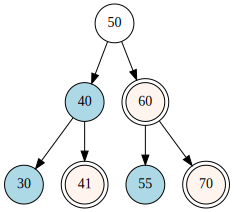

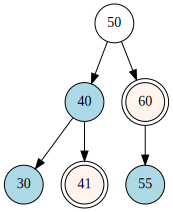

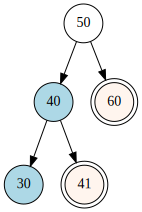

In [31]:
#Checking if a bst tree is a complete bst tree
b1 = BST(50)
b1.insert(40)
b1.insert(60)
b1.insert(30)
b1.insert(41)
b1.insert(55)
b1.insert(70)

b2 = BST(50)
b2.insert(40)
b2.insert(60)
b2.insert(30)
b2.insert(41)
b2.insert(55)

b3 = BST(50)
b3.insert(40)
b3.insert(60)
b3.insert(30)
b3.insert(41)

visualize_tree(b1)
visualize_tree(b2)
visualize_tree(b3)

In [26]:
def is_complete_tree(root):
    to_visit = [root]
    child = 0
    
    while to_visit:
        current = to_visit.pop(0)
            
        if current.left:
            to_visit.append(current.left)
            child = child + 1
            
        if current.right:
            to_visit.append(current.right)
            child = child + 1
            
        if child == 0 or child == 2:
            child = 0
            continue
            
        return False
    
    return True

In [32]:
print("b1 is complete tree :", is_complete_tree(b1))
print("b2 is complete tree :", is_complete_tree(b2))
print("b3 is complete tree :", is_complete_tree(b3))

b1 is complete tree : True
b2 is complete tree : False
b3 is complete tree : True


In [35]:
#checking whether two nodes are siblings(children of same parent)
def is_sibling(root, a_value, b_value):
    a_node = None
    b_node = None
    
    #Finding a_node and b_node
    to_visit = [root]
    
    while to_visit:
        current = to_visit.pop(0)
        
        
        if current.value == a_value:
            a_node = current
            
        if current.value == b_value:
            b_node = current
        
        
        if current.left:
            to_visit.append(current.left)
            
        if current.right:
            to_visit.append(current.right)
    
    #Simply comparing their parent
    if a_node.parent == b_node.parent:
        return True
   
    return False

In [39]:
print(is_sibling(b1, 40, 60))
print(is_sibling(b1, 40, 55))
print(is_sibling(b1, 30, 70))

True
False
False


In [47]:
#checking the level of a node
def get_level(root, node_value, level=1):
    if root is None:
        return 0
    
    if root.value == node_value:
        return level
    
    downlevel = get_level(root.left, node_value, level+1)
    
    if downlevel != 0:
        return downlevel
    
    downlevel = get_level(root.right, node_value, level+1)
    
    return downlevel


In [48]:
#checking whether two nodes are cousins(not siblings and on same level)
def is_cousin(root, a_value, b_value):
    #Not sibling case
    if is_sibling(root, a_value, b_value):
        return False
    
    #They are on same level case
    if get_level(root, a_value) == get_level(root, b_value):
        return True
    
    return False

In [57]:
print(is_cousin(b1, 41, 55))
print(is_cousin(b1, 30, 70))
print(is_cousin(b1, 41, 60))
print(is_cousin(b1, 40, 60))

True
True
False
False
